In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
## lets create synthetic data points
from sklearn.datasets import make_classification

In [4]:
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [5]:
x

array([[ 0.69890466, -3.28292368],
       [-0.09464237, -0.93292311],
       [ 2.47886289,  0.62572103],
       ...,
       [-0.84287591, -0.62975193],
       [-2.0182271 ,  0.39193652],
       [-1.2782234 , -0.96974078]])

In [6]:
y

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,

In [7]:
pd.DataFrame(x)[0]

0      0.698905
1     -0.094642
2      2.478863
3      0.875792
4     -1.081939
         ...   
995   -0.074041
996   -1.956680
997   -0.842876
998   -2.018227
999   -1.278223
Name: 0, Length: 1000, dtype: float64

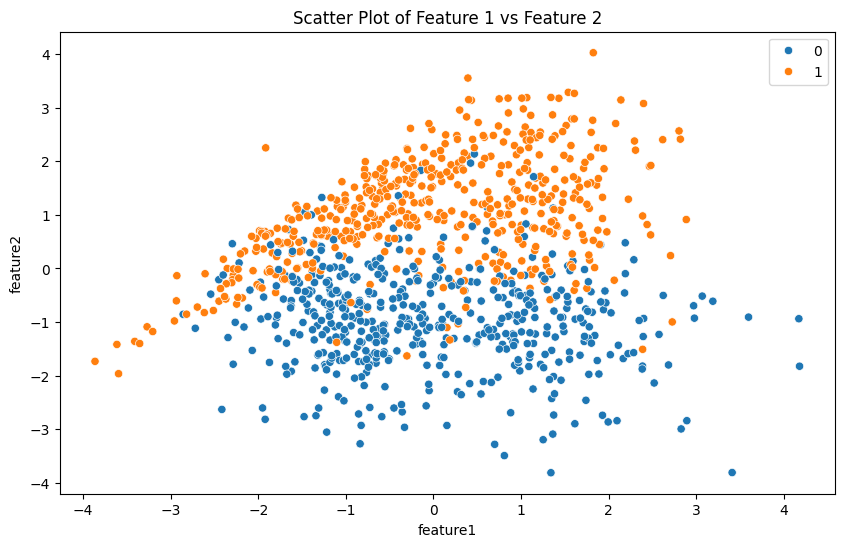

In [8]:
df = pd.DataFrame(x, columns=['feature1', 'feature2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['feature1'], y=df['feature2'], hue=y)
plt.title('Scatter Plot of Feature 1 vs Feature 2')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVC

In [11]:
svc=SVC(kernel='linear')

In [12]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [13]:
y_pred=svc.predict(x_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix


In [15]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       117
           1       0.87      0.83      0.85       133

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250

[[100  17]
 [ 22 111]]


In [16]:
rbf=SVC(kernel='rbf')
rbf.fit(x_train,y_train)


SVC()

In [17]:
ypred1=rbf.predict(x_test)

In [18]:
print(classification_report(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       117
           1       0.88      0.86      0.87       133

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250

[[102  15]
 [ 18 115]]


In [19]:
### sigmoid is an another kernel
### can try if needed
## tho bad accuracy

In [20]:
### hyper parameter tuning

In [21]:
from sklearn.model_selection import GridSearchCV

## defining parameter guide

parameter_grid={ 'C': [0.1, 1 , 10, 100, 1000],
                'gamma' : [1, 0.1, 0.01, 0.001, 0.001],
             'kernel': ['rbf']}

In [22]:
grid=GridSearchCV(SVC(),param_grid=parameter_grid,refit=True,cv=5,verbose=3)

In [23]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.793 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [24]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [25]:
y_pred4=grid.predict(x_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       117
           1       0.87      0.88      0.88       133

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250

[[100  17]
 [ 16 117]]
